### Load required packages

In [23]:
import sklearn
import pandas as pd
import pybgt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Load data

In [2]:
sales = pd.read_csv("home_data.csv")
print sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB
None


### Split data into train and test

In [3]:
train_data, test_data = train_test_split(sales, test_size=0.2, random_state = 0)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

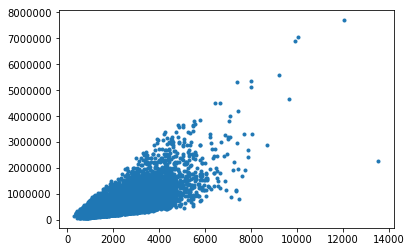

In [5]:
plt.plot(sales['sqft_living'],sales['price'], '.')

## Build regression model

In [6]:
lm = linear_model.LinearRegression()

Sklearn is weird and doesn't like pandas. This requires we reshape pandas columns into arrays for feeding it into 

In [15]:
X = train_data['sqft_living'].values.reshape(len(train_data.id),1)
y = train_data['price'].values.reshape(len(train_data.id),1)
print X.shape, y.shape

(17290L, 1L) (17290L, 1L)


In [16]:
lm.fit(X,y)

### Test model outputs

In [19]:
test_x = test_data['sqft_living'].values.reshape(len(test_data.id),1)
test_y = test_data['price'].values.reshape(len(test_data.id),1)

In [20]:
y_pred = lm.predict(test_x)

In [24]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Root Mean Squared Error: %.2f"
      % sqrt(mean_squared_error(test_y, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))

('Coefficients: \n', array([[ 283.96855737]]))
Root Mean squared error: 248879.06
Variance score: 0.48
